In [10]:
import pickle
import pandas as pd
import seaborn as sns
import numpy as np
sns.set()
import matplotlib.pyplot as plt

In [5]:
wmt_toen = pickle.load(open('./wmt_toen_bleurt.pkl', 'rb'))
wmt_toen

,system,sid,raw_score,score,N,lp,reference,source,output,year,system_full,bleurt
0,online-B,1673,63.0,-0.001670,2,cs-en,Ten statements by Albert Einstein that enriche...,"Desatero výroků Alberta Einsteina, které oboha...",Ten Commandments statements of Albert Einstein...,2016,NaN,-0.167327
1,uedin-nmt,1673,62.0,-0.400967,1,cs-en,Ten statements by Albert Einstein that enriche...,"Desatero výroků Alberta Einsteina, které oboha...","The Ten Commandments of Albert Einstein, which...",2016,NaN,-0.051850
2,PJATK,1673,89.0,1.134907,1,cs-en,Ten statements by Albert Einstein that enriche...,"Desatero výroků Alberta Einsteina, které oboha...","The Ten sayings, Albert Einstein, which enrich...",2016,NaN,0.099259
3,jhu-pbmt,1673,77.0,0.476686,2,cs-en,Ten statements by Albert Einstein that enriche...,"Desatero výroků Alberta Einsteina, které oboha...","The Ten utterances of Albert Einstein, which e...",2016,NaN,0.384091
4,cu-mergedtrees,1673,88.0,0.740644,1,cs-en,Ten statements by Albert Einstein that enriche...,"Desatero výroků Alberta Einsteina, které oboha...","The ten Albert Einstein, enriching world.\n",2016,NaN,-0.270378
...,...,...,...,...,...,...,...,...,...,...,...,...
108921,tilde-nc-nmt.6881,850,29.0,-1.600210,2,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,If the State Consumer Rights Protection Author...,2019,NaN,0.351030
108922,online-G.0,850,14.0,-0.996679,1,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,The state consumer rights protection authority...,2019,NaN,0.031293
108923,MSRA.MASS.6945,850,50.0,-0.841789,1,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,If the State Consumer Rights Protection Author...,2019,NaN,0.300797
108924,TartuNLP-c.6908,850,79.0,0.360166,2,lt-en,If the State Consumer Rights Protection Author...,Valstybinei vartotojų teisių apsaugos tarnybai...,State Consumer Rights Protection Service (VVTA...,2019,NaN,0.101297


In [6]:
wmt_toen.lp.unique()

array(['cs-en', 'ru-en', 'ro-en', 'de-en', 'tr-en', 'fi-en', 'lv-en',
       'zh-en', 'et-en', 'kk-en', 'gu-en', 'lt-en'], dtype=object)

<ipython-input-12-d714a5b7ff8f>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure()


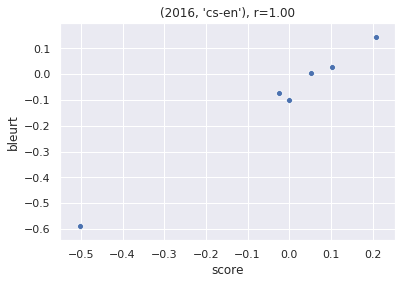

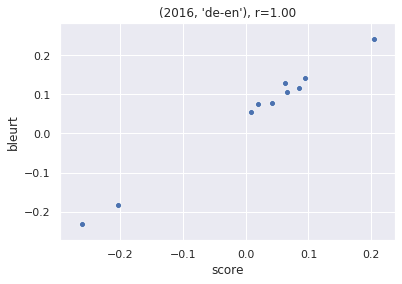

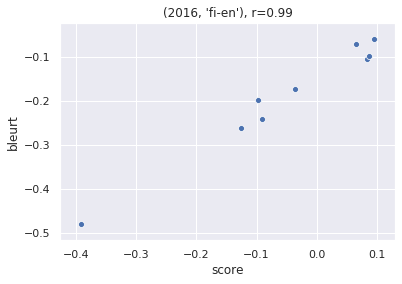

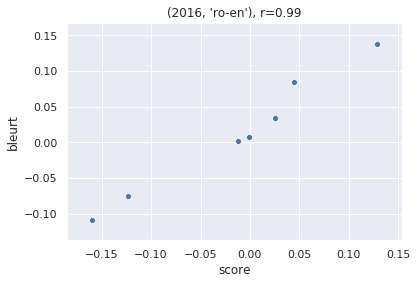

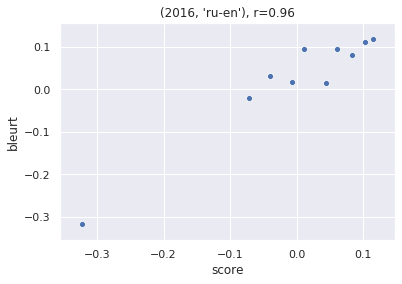

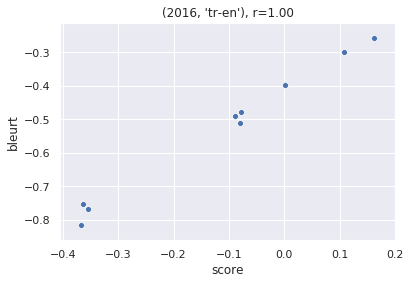

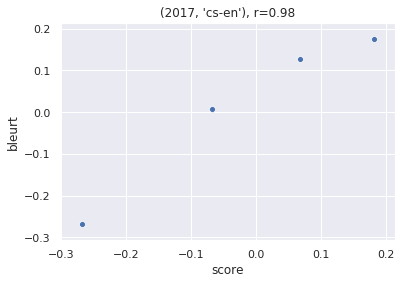

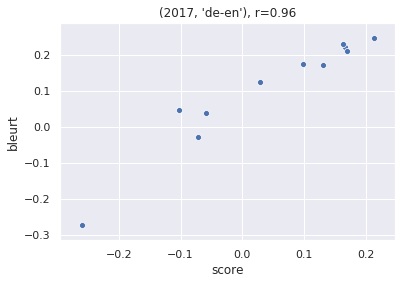

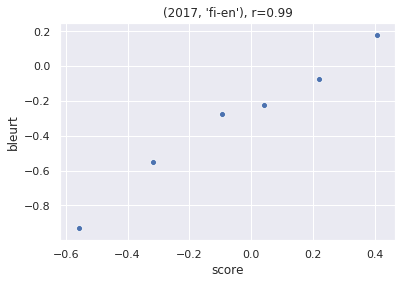

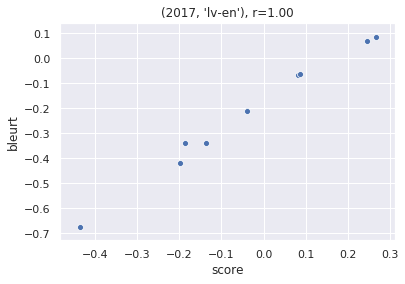

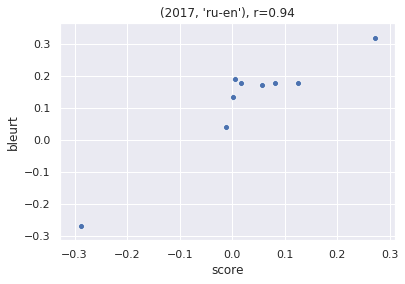

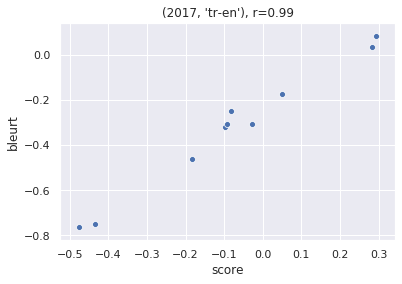

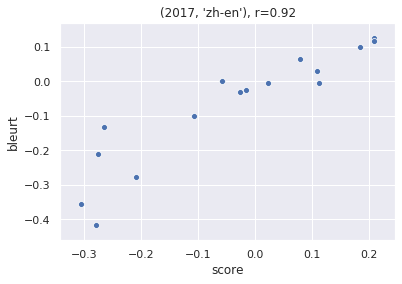

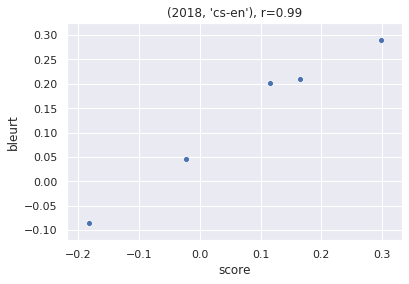

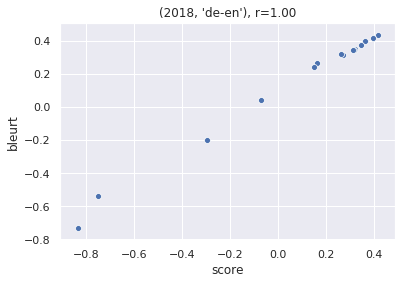

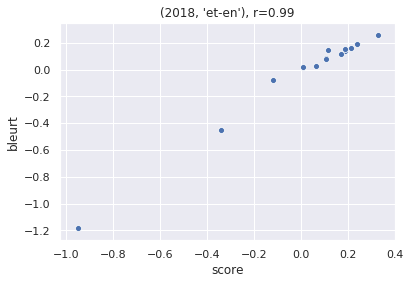

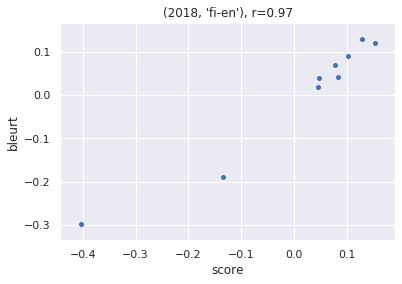

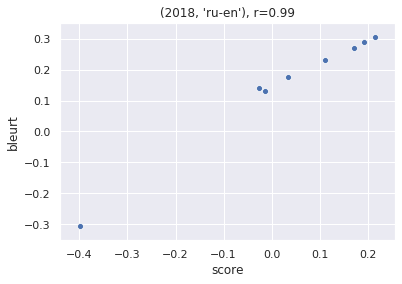

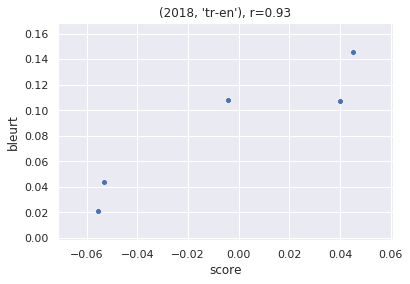

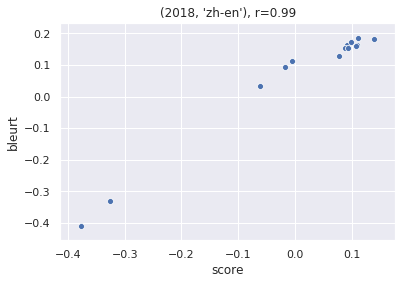

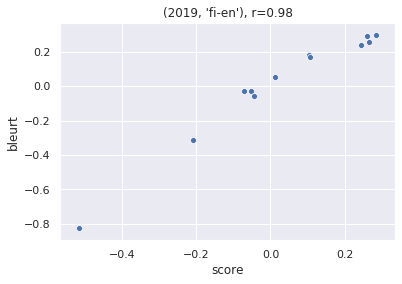

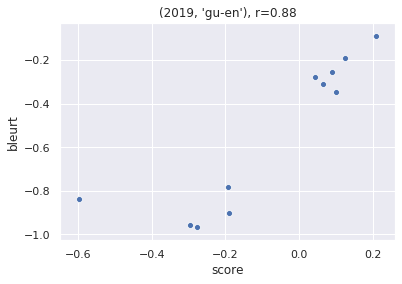

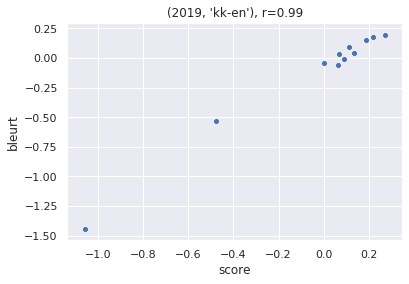

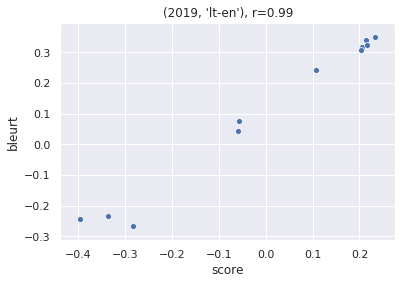

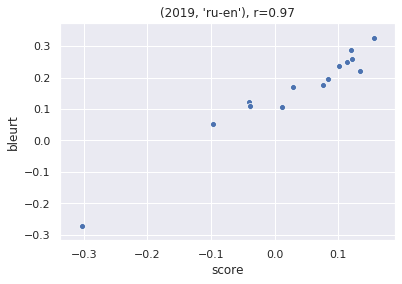

In [12]:
for i, group in wmt_toen.groupby(['year', 'lp']):
    means = group.groupby('system').mean()
    corr = means.corr()['score']['bleurt']
    
    plt.figure()
    plt.title('%s, r=%.2f' % (i, corr))
    sns.scatterplot(x='score', y='bleurt', data=means)